**INSTAGRAM REACH ANALYSIS : FOOD BLOGGERS**

---



In [1]:
# =========================================
# Import Libraries
# =========================================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)

In [3]:
# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
!pip install vaderSentiment

In [5]:
# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
# Visualization
from wordcloud import WordCloud

In [7]:
# =========================================
# Setup and Initialization
# =========================================

In [8]:

# Install required packages (Uncomment if running in a new environment)
# !pip install nltk vaderSentiment wordcloud

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# =========================================
#  Load Data
# =========================================

In [12]:
# Load the dataset
data = pd.read_csv('merged_file.csv')

In [13]:
# Display initial rows
print("Initial Data Snapshot:")
print(data.head(15))

Initial Data Snapshot:
          username posts_count followers_count following_count  \
0    vismaifoodies       1,323            1.4M               4   
1   mysorefoodgram         129            2240             669   
2   mysorefoodgram         129            2240             669   
3   mysorefoodgram         129            2240             669   
4   mysorefoodgram         129            2240             669   
5   mysorefoodgram         129            2240             669   
6   mysorefoodgram         129            2240             669   
7   mysorefoodgram         129            2240             669   
8   mysorefoodgram         129            2240             669   
9   mysorefoodgram         129            2240             669   
10  mysorefoodgram         129            2240             669   
11  food_hunter_.1         577           38.9K               0   
12  food_hunter_.1         577           38.9K               0   
13  food_hunter_.1         577           38.9K       

In [14]:
# =========================================
# Data Cleaning
# =========================================


In [15]:
# Drop the 'overall_sentiment' column
data.drop('overall_sentiment', axis=1, inplace=True)

In [16]:
# Check for missing values
print("\nMissing Values Before Imputation:")
print(data.isnull().sum())


Missing Values Before Imputation:
username             0
posts_count          0
followers_count      0
following_count      0
Bio                 82
post_url             0
likes                0
hashtags           384
location             0
post_date            0
comments           491
comments_count       0
dtype: int64


In [17]:
# Fill missing values
data['Bio'].fillna('Unknown', inplace=True)
data['comments'].fillna('No Comments', inplace=True)
data['hashtags'].fillna('No Hashtags', inplace=True)

<ipython-input-17-d33dba118316>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bio'].fillna('Unknown', inplace=True)
<ipython-input-17-d33dba118316>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [18]:
# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
username           0
posts_count        0
followers_count    0
following_count    0
Bio                0
post_url           0
likes              0
hashtags           0
location           0
post_date          0
comments           0
comments_count     0
dtype: int64


In [19]:
# =========================================
# Feature Engineering
# =========================================

In [20]:
# Function to convert follower counts from strings to numeric values
def convert_followers_count(value):
    if isinstance(value, str):
        value = value.lower().replace(',', '').strip()
        if 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        else:
            return float(value)
    return np.nan

In [21]:
# Apply conversion to 'followers_count'
data['followers_count'] = data['followers_count'].apply(convert_followers_count)

In [22]:
# Function to clean and convert specified columns
def clean_and_convert(col):
    data[col].replace("Not Available", np.nan, inplace=True)
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [23]:
# Columns to clean
columns_to_clean = ['likes', 'posts_count', 'followers_count', 'following_count']
for col in columns_to_clean:
    clean_and_convert(col)

<ipython-input-22-592068a69007>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace("Not Available", np.nan, inplace=True)
<ipython-input-22-592068a69007>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [24]:
# Fill missing numeric values with median
for col in columns_to_clean:
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-24-dd225c19e598>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [25]:
# Convert 'post_date' to datetime
data['post_date'] = pd.to_datetime(data['post_date'], errors='coerce')

In [26]:
# Extract additional date features
data['year'] = data['post_date'].dt.year
data['month'] = data['post_date'].dt.month
data['day'] = data['post_date'].dt.day
data['hour'] = data['post_date'].dt.hour

In [27]:
# =========================================
# Text Preprocessing and Sentiment Analysis
# =========================================

In [28]:
# Function to preprocess comments
def preprocess_comment(comment):
    if comment == 'No Comments':
        return comment
    comment = comment.lower()
    comment = re.sub(r'[^\w\s]', '', comment)
    tokens = word_tokenize(comment)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [29]:
# Apply preprocessing
data['cleaned_comments'] = data['comments'].apply(preprocess_comment)

In [30]:
# Function to get sentiment score
def get_sentiment_score(comment):
    if comment in ['unknown', 'No Comments']:
        return 0  # Neutral
    score = analyzer.polarity_scores(comment)
    return score['compound']

In [31]:
# Apply sentiment analysis
data['sentiment_score'] = data['cleaned_comments'].apply(get_sentiment_score)

In [32]:
# Categorize sentiment
data['sentiment'] = data['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

In [33]:
# Classify post types based on 'Bio'
def classify_post_type(bio):
    bio = bio.lower()
    if 'recipe' in bio:
        return 'Recipe'
    elif 'dish' in bio or 'food' in bio:
        return 'Food Post'
    elif 'user' in bio:
        return 'User-Generated Content'
    else:
        return 'Other'

data['post_type'] = data['Bio'].apply(classify_post_type)

In [34]:
data_balanced=data.copy()

In [ ]:
# =========================================
# Additional Feature Engineering
# =========================================

In [35]:
# Engagement Metrics
data_balanced['engagement_rate'] = (data_balanced['likes'] + data_balanced['comments_count']) / data_balanced['posts_count']
data_balanced['avg_likes_per_post'] = data_balanced['likes'] / data_balanced['posts_count']
data_balanced['avg_comments_per_post'] = data_balanced['comments_count'] / data_balanced['posts_count']
data_balanced['total_reach_estimated'] = (data_balanced['likes'] + data_balanced['comments_count']) / 100  # Assuming engagement_to_reach_ratio = 100
# Bio Length
data_balanced['bio_length'] = data_balanced['Bio'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Temporal Features
data_balanced['day_of_week'] = data_balanced['post_date'].dt.day_name()
data_balanced['is_weekend'] = data_balanced['post_date'].dt.dayofweek >= 5

# Hashtag Count
data_balanced['hashtag_count'] = data_balanced['hashtags'].apply(lambda x: len(x.split(',')) if x != 'No Hashtags' else 0)

# Collaboration Indicator
data_balanced['collaboration'] = data_balanced['Bio'].apply(lambda x: 1 if 'collab' in x.lower() else 0)

# Engagement to Follower Ratio
data_balanced['engagement_to_follower_ratio'] = (data_balanced['likes'] + data_balanced['comments_count']) / data_balanced['followers_count']

# Months Active
data_balanced['months_active'] = (data_balanced['post_date'] -data_balanced['post_date'].min()).dt.days // 30


In [36]:
# Explode hashtags into separate rows
data_balanced['hashtag_list'] = data_balanced['hashtags'].str.split(',')
data_exploded = data_balanced.explode('hashtag_list')

# Clean hashtag list
data_exploded['hashtag_list'] = data_exploded['hashtag_list'].str.strip().str.lower()

# Group by hashtags and calculate average likes and engagement rate
hashtag_performance = data_exploded.groupby('hashtag_list').agg({
    'likes': 'mean',
    'engagement_rate': 'mean'
}).reset_index()

In [37]:

# Binary Features for Popular Hashtags
popular_hashtags = ['#food', '#foodporn', '#delicious']  # Extend as needed
for tag in popular_hashtags:
    tag_clean = tag.strip("#").lower()
    data_balanced[f'hashtag_{tag_clean}'] = data_balanced['hashtags'].apply(
        lambda x: 1 if pd.notnull(x) and tag.lower() in x.lower() else 0
    )


In [38]:
data_balanced.head()

,username,posts_count,followers_count,following_count,Bio,post_url,likes,hashtags,location,post_date,...,day_of_week,is_weekend,hashtag_count,collaboration,engagement_to_follower_ratio,months_active,hashtag_list,hashtag_food,hashtag_foodporn,hashtag_delicious
0,vismaifoodies,1323,1400000.0,4,We help Foodies to get the Perfect Recipes.\nF...,https://www.instagram.com/vismaifoodies/p/C7ec...,2944.0,"#MAGGIApnaFoodBusiness, #AFB, #OnlineFoodChann...",Locations,2024-05-27 14:44:41+00:00,...,Monday,False,6,1,0.002109,111.0,"[#MAGGIApnaFoodBusiness, #AFB, #OnlineFoodCh...",0,0,0
1,mysorefoodgram,129,2240.0,669,Unknown,https://www.instagram.com/mysorefoodgram/p/CpR...,65.0,No Hashtags,Locations,2023-03-02 03:57:48+00:00,...,Thursday,False,0,0,0.029018,96.0,[No Hashtags],0,0,0
2,mysorefoodgram,129,2240.0,669,Unknown,https://www.instagram.com/mysorefoodgram/p/CpP...,105.0,No Hashtags,Locations,2023-03-01 07:23:55+00:00,...,Wednesday,False,0,0,0.046875,96.0,[No Hashtags],0,0,0
3,mysorefoodgram,129,2240.0,669,Unknown,https://www.instagram.com/mysorefoodgram/p/CpR...,178.0,No Hashtags,Locations,2023-03-02 03:58:37+00:00,...,Thursday,False,0,0,0.079464,96.0,[No Hashtags],0,0,0
4,mysorefoodgram,129,2240.0,669,Unknown,https://www.instagram.com/mysorefoodgram/p/CpR...,101.0,No Hashtags,Locations,2023-03-02 03:59:43+00:00,...,Thursday,False,0,0,0.045089,96.0,[No Hashtags],0,0,0


In [39]:
# =========================================
# Visualization
# =========================================

In [40]:
data=data_balanced.copy()

<ipython-input-41-af01508e72ac>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_filtered['year_month'] = data_filtered['post_date'].dt.to_period('M')
<ipython-input-41-af01508e72ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year_month'] = data_filtered['post_date'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

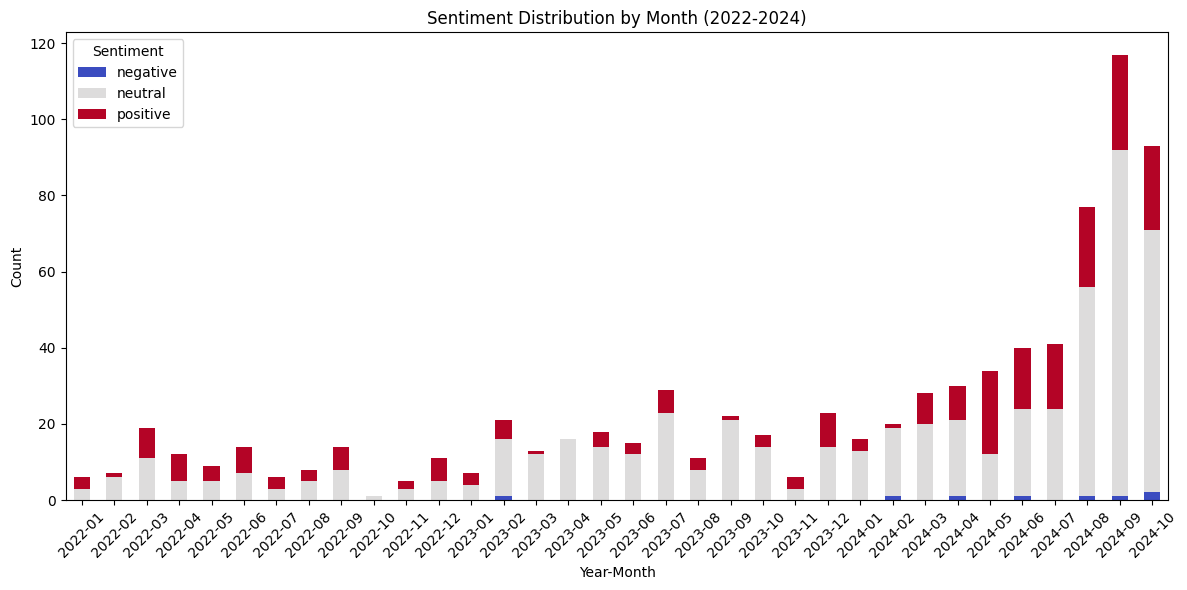

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'post_date' is in datetime format
data['post_date'] = pd.to_datetime(data['post_date'])

# Filter data for the years 2022 to 2024
data_filtered = data[(data['post_date'].dt.year >= 2022) & (data['post_date'].dt.year <= 2024)]

# Extract month and year for grouping
data_filtered['year_month'] = data_filtered['post_date'].dt.to_period('M')

# Group by month and sentiment, then count occurrences
sentiment_over_time = data_filtered.groupby(['year_month', 'sentiment']).size().reset_index(name='count')

# Pivot the DataFrame to get a structure suitable for plotting
sentiment_over_time_pivot = sentiment_over_time.pivot(index='year_month', columns='sentiment', values='count').fillna(0)

# Now, create the plot
plt.figure(figsize=(12, 6))  # Set figure size
sentiment_over_time_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))

# Format x-axis
plt.title('Sentiment Distribution by Month (2022-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


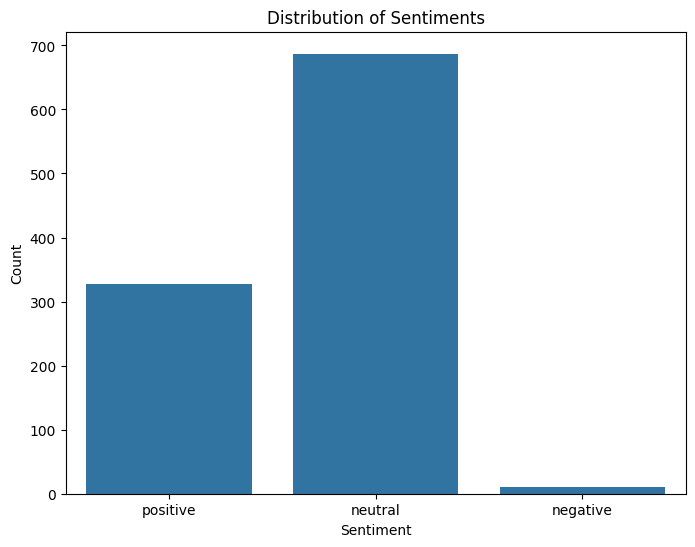

In [42]:
# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [43]:
# Sentiment Distribution Percentage
sentiment_distribution = data['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_distribution)


Sentiment Distribution (%):
sentiment
neutral     67.089844
positive    31.933594
negative     0.976562
Name: proportion, dtype: float64


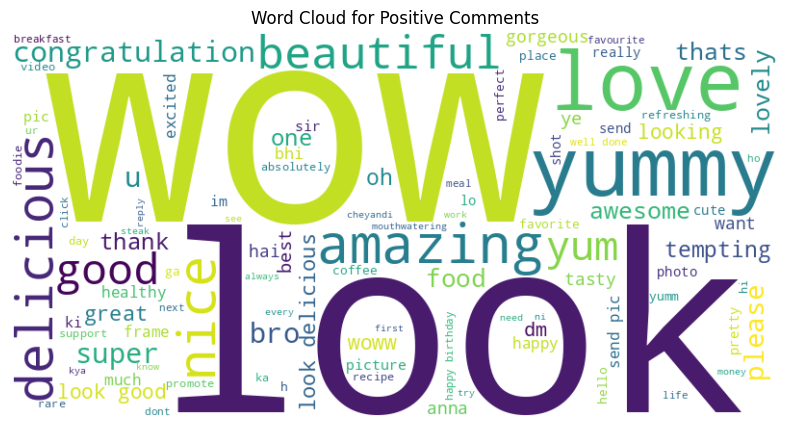

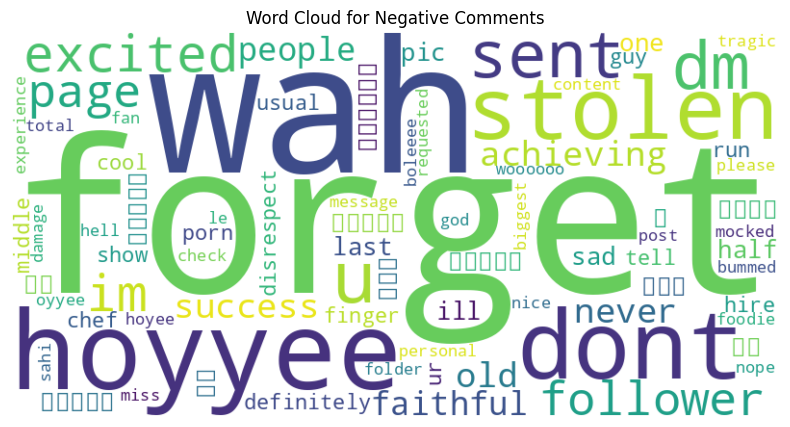

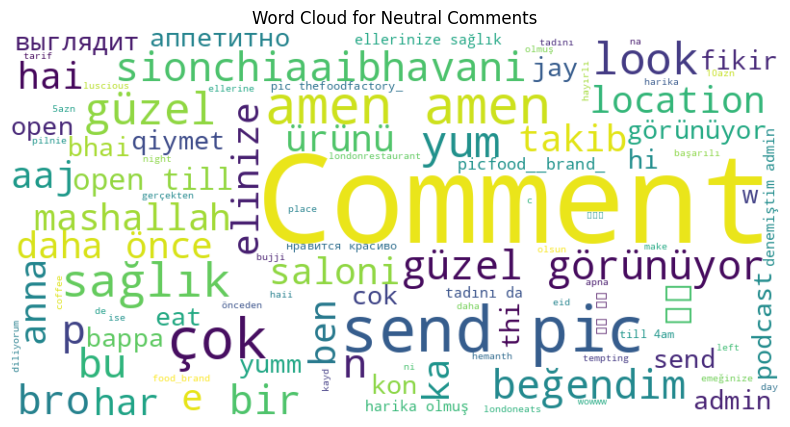

In [44]:
# Word Clouds for Each Sentiment
def plot_wordcloud(sentiment):
    text = " ".join(
        review for review in data[data['sentiment'] == sentiment]['cleaned_comments']
    )
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=100,
        background_color="white"
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Comments")
    plt.show()
for sentiment in ['positive', 'negative', 'neutral']:
    plot_wordcloud(sentiment)

In [45]:
# =========================================
#  Balancing Classes
# =========================================

In [46]:
from sklearn.utils import resample

In [47]:
# Separate classes
negative = data[data['sentiment'] == 'negative']
positive = data[data['sentiment'] == 'positive']
neutral = data[data['sentiment'] == 'neutral']

In [48]:
# Upsample positive and neutral to match negative class
positive_upsampled = resample(
    positive,
    replace=True,
    n_samples=len(neutral),
    random_state=42
)
negative_upsampled = resample(
    negative,
    replace=True,
    n_samples=len(neutral),
    random_state=42
)

In [49]:
# Combine to form a balanced dataset
data_balanced = pd.concat([negative_upsampled, positive_upsampled, neutral])

In [50]:
# Verify new distribution
print("\nBalanced Sentiment Distribution:")
print(data_balanced['sentiment'].value_counts())


Balanced Sentiment Distribution:
sentiment
negative    687
positive    687
neutral     687
Name: count, dtype: int64


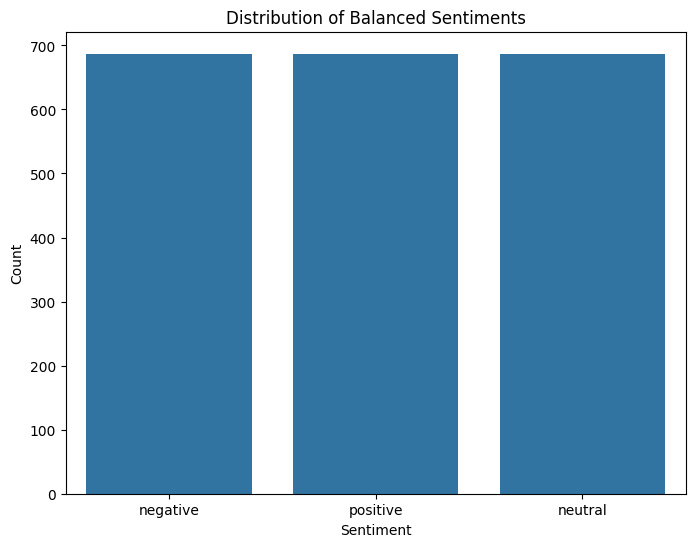

In [51]:
# Plot Balanced Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data_balanced)
plt.title('Distribution of Balanced Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-52-aaf72f308091>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_filtered['year_month'] = data_filtered['post_date'].dt.to_period('M')
<ipython-input-52-aaf72f308091>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year_month'] = data_filtered['post_date'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

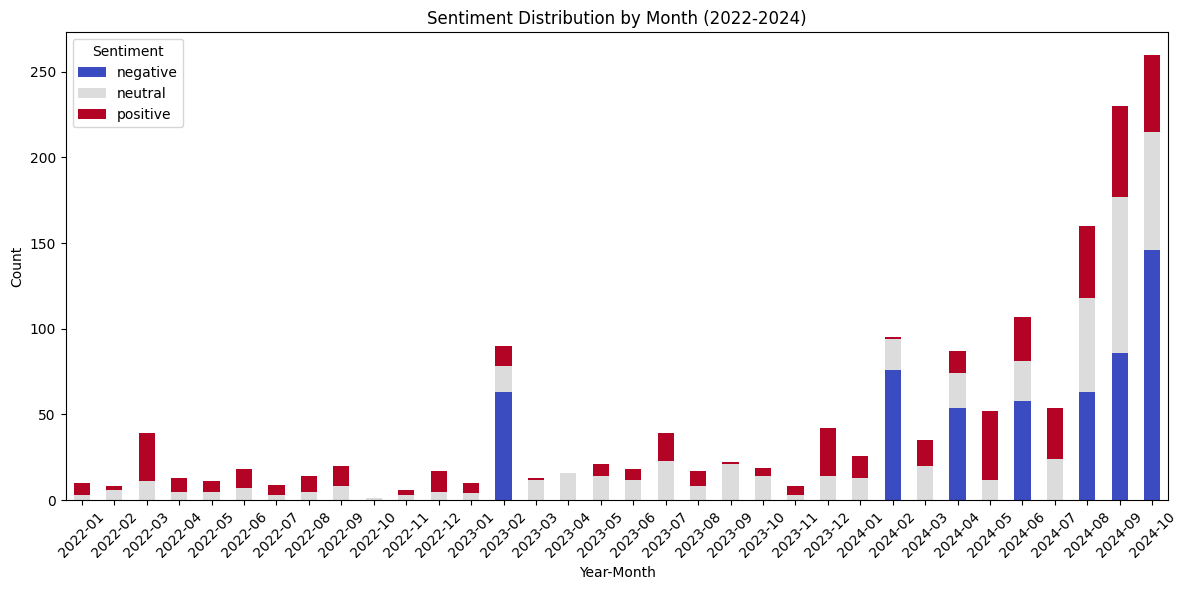

In [52]:

# Ensure 'post_date' is in datetime format
data_balanced['post_date'] = pd.to_datetime(data_balanced['post_date'])

# Filter data for the years 2022 to 2024
data_filtered = data_balanced[(data_balanced['post_date'].dt.year >= 2022) & (data_balanced['post_date'].dt.year <= 2024)]

# Extract month and year for grouping
data_filtered['year_month'] = data_filtered['post_date'].dt.to_period('M')

# Group by month and sentiment, then count occurrences
sentiment_over_time = data_filtered.groupby(['year_month', 'sentiment']).size().reset_index(name='count')

# Pivot the DataFrame to get a structure suitable for plotting
sentiment_over_time_pivot = sentiment_over_time.pivot(index='year_month', columns='sentiment', values='count').fillna(0)

# Now, create the plot
plt.figure(figsize=(12, 6))  # Set figure size
sentiment_over_time_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))

# Format x-axis
plt.title('Sentiment Distribution by Month (2022-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [54]:
# =========================================
# Hashtag Analysis
# =========================================

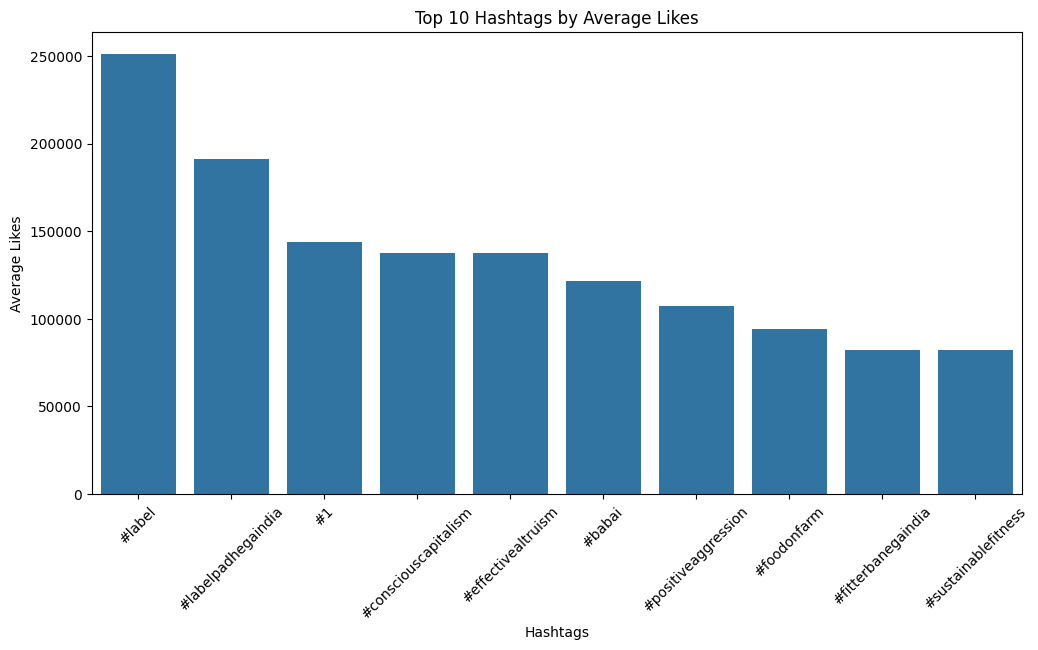

In [55]:


# Top 10 Hashtags by Average Likes
top_hashtags = hashtag_performance.nlargest(10, 'likes')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_hashtags, x='hashtag_list', y='likes')
plt.title('Top 10 Hashtags by Average Likes')
plt.ylabel('Average Likes')
plt.xlabel('Hashtags')
plt.xticks(rotation=45)
plt.show()

In [57]:
# =========================================
# Dropping Unnecessary Features
# =========================================

In [58]:
unnecessary_features = [
    'post_date', 'username', 'location', 'post_url', 'hashtags' ,
    'comments', 'cleaned_comments', 'Bio'
]
data_balanced.drop(columns=unnecessary_features, inplace=True)

print("\nRemaining Columns After Dropping Unnecessary Features:")
print(data_balanced.columns)


Remaining Columns After Dropping Unnecessary Features:
Index(['posts_count', 'followers_count', 'following_count', 'likes',
       'comments_count', 'year', 'month', 'day', 'hour', 'sentiment_score',
       'sentiment', 'post_type', 'engagement_rate', 'avg_likes_per_post',
       'avg_comments_per_post', 'total_reach_estimated', 'bio_length',
       'day_of_week', 'is_weekend', 'hashtag_count', 'collaboration',
       'engagement_to_follower_ratio', 'months_active', 'hashtag_list',
       'hashtag_food', 'hashtag_foodporn', 'hashtag_delicious'],
      dtype='object')


In [60]:
# ============================================================
#  Feature Scaling  and Encoding Categorical Variables and PCA
# ============================================================

In [61]:
# List of numerical features to scale
numerical_features = [
    'likes', 'followers_count', 'posts_count',
    'following_count', 'engagement_rate',
    'avg_likes_per_post', 'avg_comments_per_post',
    'bio_length', 'hashtag_count',
    'collaboration', 'hashtag_food',
    'hashtag_foodporn', 'hashtag_delicious'
]

In [62]:
# Impute missing values if any
imputer = SimpleImputer(strategy='median')

# Select only numerical features for imputation
numerical_data = data_balanced[numerical_features]

# Perform imputation on numerical data only
data_imputed = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns, index=data_balanced.index)

# Join imputed numerical features with the rest of the dataframe
data_balanced = data_balanced.drop(columns=numerical_features).join(data_imputed)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_balanced[numerical_features])  # Scale only numerical features

# Apply PCA to scaled numerical features
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f'\nExplained Variance Ratio by PCA Components:\n{pca.explained_variance_ratio_}')


Explained Variance Ratio by PCA Components:
[0.31086806 0.18825626 0.16392766 0.09478846 0.05879948 0.05238922
 0.04512546 0.03311014 0.0316985  0.01247616]


In [63]:
# Define target variable
y = data_balanced['total_reach_estimated']

# Drop target from features
data_balanced.drop(columns=['total_reach_estimated'], inplace=True)

In [64]:
# =========================================
#  Model Training and Evaluation
# =========================================

In [65]:
print("Shape of X_pca:", X_pca.shape)
print("Length of y:", len(y))


Shape of X_pca: (50983, 10)
Length of y: 50983


In [66]:
data_balanced.head()

,comments_count,year,month,day,hour,sentiment_score,sentiment,post_type,day_of_week,is_weekend,...,following_count,engagement_rate,avg_likes_per_post,avg_comments_per_post,bio_length,hashtag_count,collaboration,hashtag_food,hashtag_foodporn,hashtag_delicious
895,6,2024.0,10.0,1.0,12.0,-0.1531,negative,Food Post,Tuesday,False,...,1063.0,0.010561,0.009153,0.001408,91.0,1.0,0.0,0.0,0.0,0.0
895,6,2024.0,10.0,1.0,12.0,-0.1531,negative,Food Post,Tuesday,False,...,1063.0,0.010561,0.009153,0.001408,91.0,1.0,0.0,0.0,0.0,0.0
895,6,2024.0,10.0,1.0,12.0,-0.1531,negative,Food Post,Tuesday,False,...,1063.0,0.010561,0.009153,0.001408,91.0,1.0,0.0,0.0,0.0,0.0
895,6,2024.0,10.0,1.0,12.0,-0.1531,negative,Food Post,Tuesday,False,...,1063.0,0.010561,0.009153,0.001408,91.0,1.0,0.0,0.0,0.0,0.0
895,6,2024.0,10.0,1.0,12.0,-0.1531,negative,Food Post,Tuesday,False,...,1063.0,0.010561,0.009153,0.001408,91.0,1.0,0.0,0.0,0.0,0.0


In [67]:

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.2,
    random_state=42
)

In [68]:
# Set up the model
model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [72]:


# Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [73]:
print("\nRandom Forest Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")



Best Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.13670876219741873
Mean Squared Error (MSE): 17.88072485999026
Root Mean Squared Error (RMSE): 4.228560613257218
R^2 Score: 0.9998218880749787


In [74]:
# Set up Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Calculate Evaluation Metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_y_pred)

In [75]:
print("\nLinear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R^2 Score: {lr_r2}")


Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 9.00443024983482
Mean Squared Error (MSE): 422.61923091331727
Root Mean Squared Error (RMSE): 20.557704903838786
R^2 Score: 0.9957902419863629


In [76]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
# Set up Support Vector Machine (SVM) model
svm_model = SVR(kernel='rbf')  # You can adjust the kernel as needed
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)




In [79]:
# Calculate Evaluation Metrics for SVM
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_y_pred)

In [80]:
print("\nSVM Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {svm_mae}")
print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"Root Mean Squared Error (RMSE): {svm_rmse}")
print(f"R^2 Score: {svm_r2}")


SVM Evaluation Metrics:
Mean Absolute Error (MAE): 2.4296980244061364
Mean Squared Error (MSE): 1970.0890570063548
Root Mean Squared Error (RMSE): 44.38568527133894
R^2 Score: 0.9803757198237572


In [81]:
# Set up Gradient Boosting model with Grid Search
gb_model = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train, y_train)

# Best Gradient Boosting Model Evaluation
best_gb_model = gb_grid_search.best_estimator_
gb_y_pred = best_gb_model.predict(X_test)

# Calculate Evaluation Metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_y_pred)

In [82]:
print("\nGradient Boosting Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"R^2 Score: {gb_r2}")


Gradient Boosting Evaluation Metrics:
Mean Absolute Error (MAE): 0.11904868895298272
Mean Squared Error (MSE): 16.01776353374503
Root Mean Squared Error (RMSE): 4.002219825764826
R^2 Score: 0.9998404452436984


In [90]:
import seaborn as sns

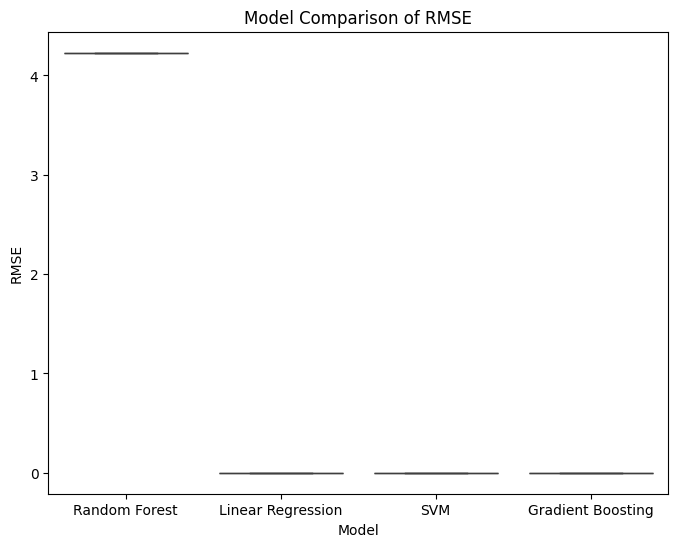

In [96]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'SVM', 'Gradient Boosting'],
    'RMSE': [rmse, 0.0, 0.0, 0.0]  # Replace with actual RMSE for other models
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='RMSE', data=results)
plt.title('Model Comparison of RMSE')
plt.ylabel('RMSE')
plt.show()

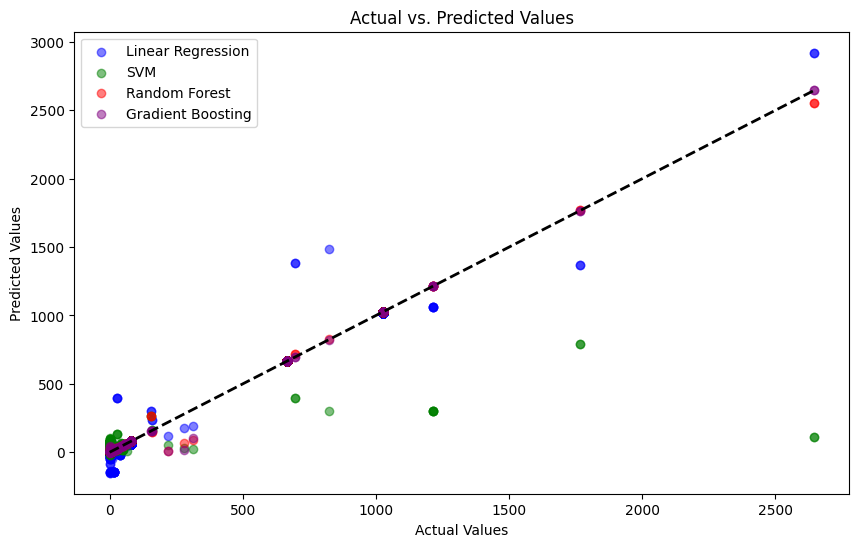

In [98]:
# Actual vs. Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, svm_y_pred, color='green', alpha=0.5, label='SVM')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Random Forest')
plt.scatter(y_test, gb_y_pred, color='purple', alpha=0.5, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


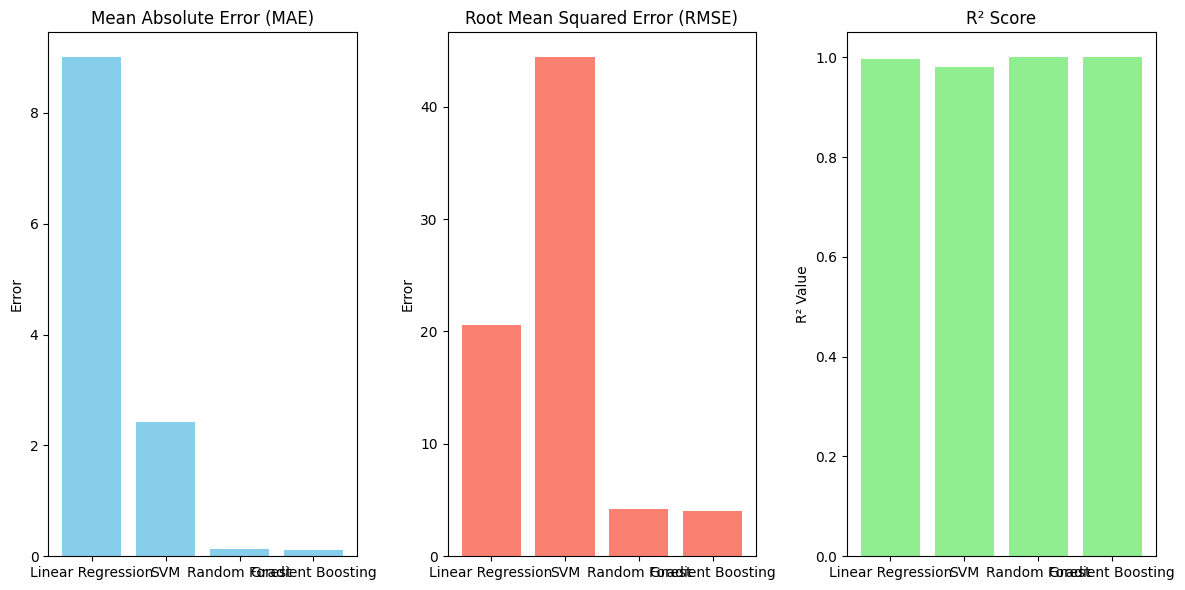

In [99]:
# Bar Chart for Evaluation Metrics
models = ['Linear Regression', 'SVM', 'Random Forest', 'Gradient Boosting']
mae_values = [lr_mae, svm_mae, mae, gb_mae]
rmse_values = [lr_rmse, svm_rmse, rmse, gb_rmse]
r2_values = [lr_r2, svm_r2, r2, gb_r2]

x = range(len(models))

plt.figure(figsize=(12, 6))

# MAE
plt.subplot(1, 3, 1)
plt.bar(x, mae_values, color='skyblue')
plt.xticks(x, models)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('Error')

# RMSE
plt.subplot(1, 3, 2)
plt.bar(x, rmse_values, color='salmon')
plt.xticks(x, models)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('Error')

# R²
plt.subplot(1, 3, 3)
plt.bar(x, r2_values, color='lightgreen')
plt.xticks(x, models)
plt.title('R² Score')
plt.ylabel('R² Value')

plt.tight_layout()
plt.show()
